# <h1 align="center"> **ENEL 503: Computer Vision (W2025)**

# <h2 align="center">**Lab2: Basic Image Filtering and Morphological Operations**

***General Notes:***
* Download the lab2 images from D2L to your lab2 folder.
* You can add this folder to your Google Drive and access it through Google Colab or work in the real-time workspace, but you will need to upload your images there.
* A lab report must be submitted for <ins>every student. No lab groups!</ins>
* The due date to submit this lab is Feb. 14 at 11:59 pm
* Read the lab instructions carefully and make sure you respond to all the open questions and coding tasks.
* After finishing your work, save this notebook with its ".iynb" extension and another version as "pdf". DON'T upload .zip folders, just the 2 .ipynb and pdf files.
* Submit your zipped folder to your Dropbox on D2L
* Don't forget to write your name and student ID below.





---


**Student Name:** Aarushi Roy Choudhury

**Student ID:** 30113987


---



In this lab, you will learn the following:

- Linear Filtering
    - Moving Average
    - Gaussian Blur
    - Image Sharpening
- Median Filtering
- Edge Detection
- Morphological Operation:
 - Erosion
 - Dilation
 - Opening
 - Closing

 Some of this lab tasks is adpated from IBM "Introduction to Computer Vision and Image Processing" Course on Coursera.


In [57]:
# Run this part if you want to mount your Google Drive to Colab VM and
# work on your lab folder directly. Make sure to enter the correct path to your
# folder. Otherwise, you can work on the realtime workspace but you will need
# to upload your images.

from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# lab folder, e.g. 'ColabNotebooks/ENEL503/Lab2'
FOLDERNAME = 'Colab Notebooks/ENEL_503_Lab2' #None
assert FOLDERNAME is not None, "[!] Enter the foldername."
FullPath = '/content/drive/MyDrive/' + FOLDERNAME
print(FullPath)

import os
os.chdir(FullPath)
!pwd # check that your folder is the current working directory


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ENEL_503_Lab2
/content/drive/MyDrive/Colab Notebooks/ENEL_503_Lab2


In [58]:
# Check the Python version
!python --version

# Install the required packages (uncomment if not on Google Colab or not already installed on your env)
# %pip install numpy
# %pip install matplotlib
# %pip install opencv-python

Python 3.11.11


In [59]:
# Import the required packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Let's define some functions that can help in displaying the images throughout the lab tasks

In [60]:
def display_image_grayscale(im):
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')
  plt.show()

def display_image_color(im):
  plt.imshow(im)
  plt.axis('off')
  plt.show()

# plot two images side by side. Mainly for unit8 images.
def plot_image_side_by_side(image_1, image_2, title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.axis('off')
    plt.show()


# <h2 align="left">**Part 1: Linear Filtering**

Spatial operations use pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision, like segmentation, and are a key building block in Artificial Intelligence algorithms.

Filtering involves enhancing an image, for example, removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to filter an image. The filter is called the kernel, and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

Consider the following image:


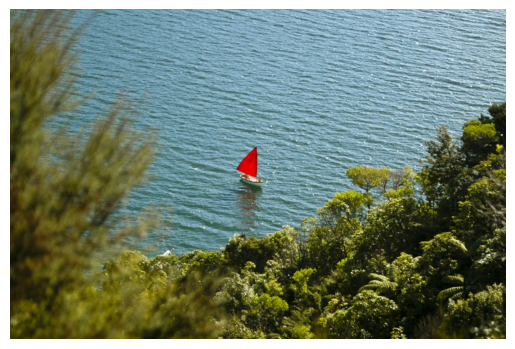

In [61]:
image = cv2.imread("New_Zealand_Boat.jpg")
# image = cv2.imread("cameraman.png", 0)

# Converts the order of the color from BGR to RGB before plotting using matplotlib
# The following command work with both color and grayscale images
display_image_color(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Let's add some Gaussian noise to the image, which will make the image look grainy:

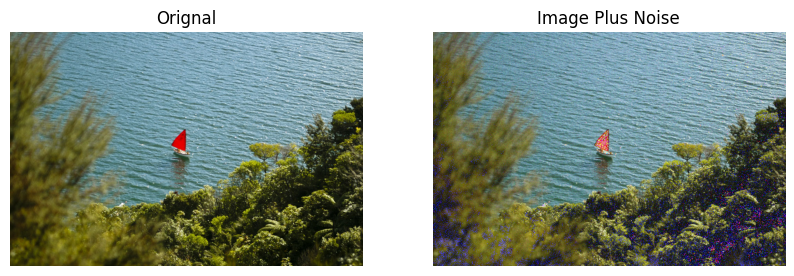

In [62]:
# Creates values using a normal distribution with a mean of 0 and standard deviation of 10,
# the values are converted to unit8 which means the values are between 0 and 255
noise_mu, noise_sigma = 0, 10 # mean and standard deviation
noise = np.random.normal(noise_mu,noise_sigma,image.shape).astype(np.uint8)

# Add the noise to the image
noisy_image = image + noise # if the sum > 255, it will be wrapped to sum-256
# Plots the original image and the image with noise using the function defined at the top
plot_image_side_by_side(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

## <font color= "blue">*Moving Average (Box Filter)*</font>

Smoothing filters average out the pixels within a neighborhood, sometimes called low-pass filters. For moving average (box) filtering, the kernel averages out the kernels in a neighborhood. The kernel values sum up to 1



In [63]:
# Create a kernel which is a L by L array where each value is 1/(L^2)
L = 7
ksize = (L,L)
kernel = np.ones(ksize)/(L**2)
#print(kernel)

The function <a href="https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths"><code>filter2D</code></a> performs 2D convolution between the image <code>src</code> and the  <code>kernel</code> on each color channel independently. The parameter <a href="https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths">ddepth</a> has to do with the data type and size of the output image, we will set it to -1 so the input and output are the same size and type (uint8).

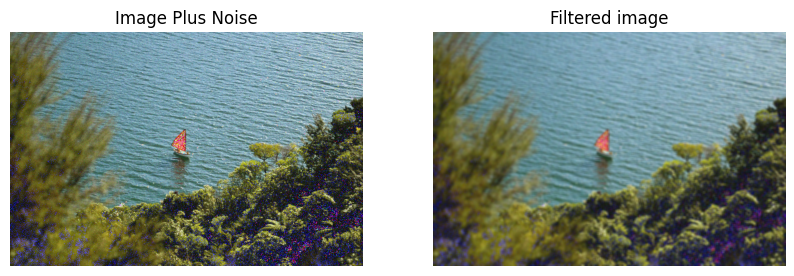

In [64]:
# Filters the images using the kernel
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel,borderType=cv2.BORDER_DEFAULT)
plot_image_side_by_side(noisy_image, image_filtered, title_1="Image Plus Noise",title_2="Filtered image")

The function `filter2D` is a general function for linear filtering, which can be used with any input kernel. Other functions can directly implement a well-known filter. For the box filter, OpenCV has the function `boxFilter` that is specific for the moving average filter. For the same kernel size, the output will be exactly the same as `filter2D`. However, try to see how we call each function.

In [65]:
image_filtered2 = cv2.boxFilter(src=noisy_image, ksize = ksize, ddepth=-1, borderType=cv2.BORDER_DEFAULT)

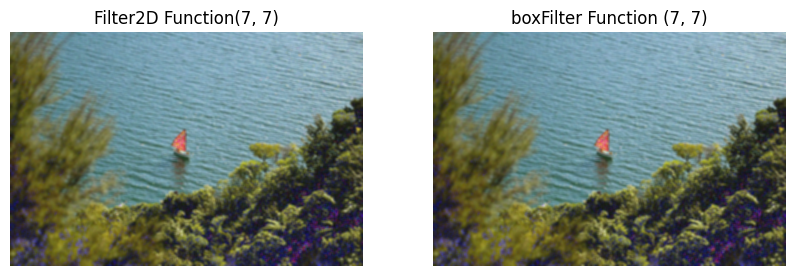

In [66]:
plot_image_side_by_side(image_filtered, image_filtered2,title_1="Filter2D Function" + str(ksize),title_2="boxFilter Function "+ str(ksize))

## <font color= "green"> Question 1 (5 Marks)</font>

Write your own function, `image_filter`, that takes two inputs: an input image matrix and a filter kernel matrix. Your function should return a filtered image calculated by the convolution of the input image and the kernel.

Remember that the convolution is calculated by looping over the input image pixels and doing the 'multiply-add' operation at each pixel to calculate the output pixel. Please note:


1.   In the correct implementation for convolution, you should rotate the kernel 180°. However, you can skip this step because we only deal with symmetric kernels in this lab.
2.   For the border, it is up to you to choose whether to assume no padding and output a black border for the unfiltered pixels or to apply any padding method you want. Please write a comment in your implementation to indicate what option you chose.
3. For simplicity, you can assume grayscale images, i.e., 2D images. Accommodation of the color images is optional, but it can be a bonus mark (+1) if you have a deficiency in other questions.
4. Test your image with the box filter kernel and compare your result with the `filter2D` function. Note that if you did the 2D implementation, you could only test your function on grayscale images, like `cameraman.png`.



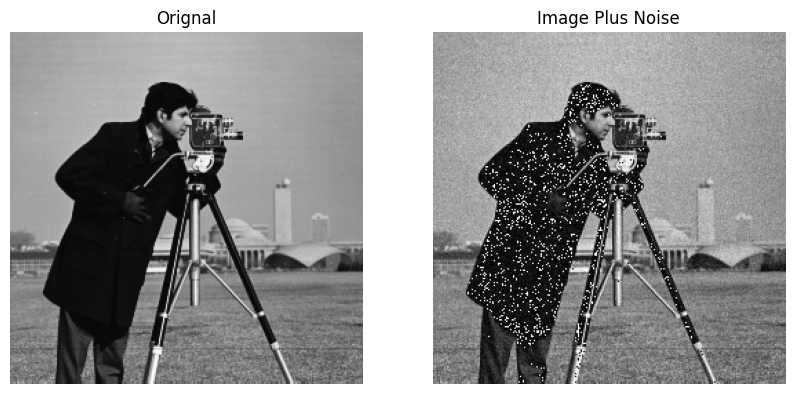

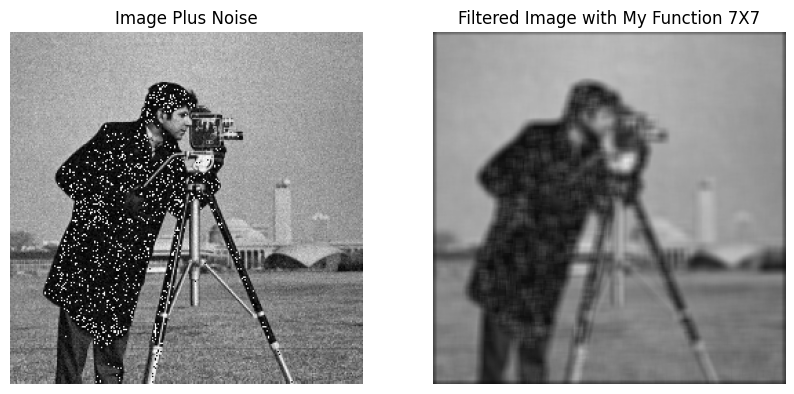

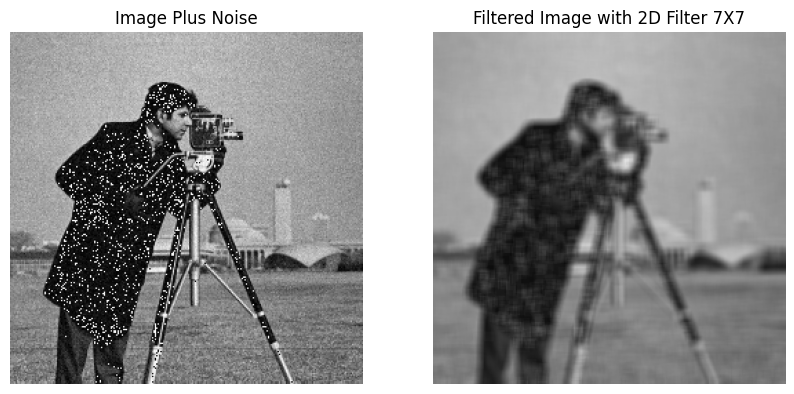

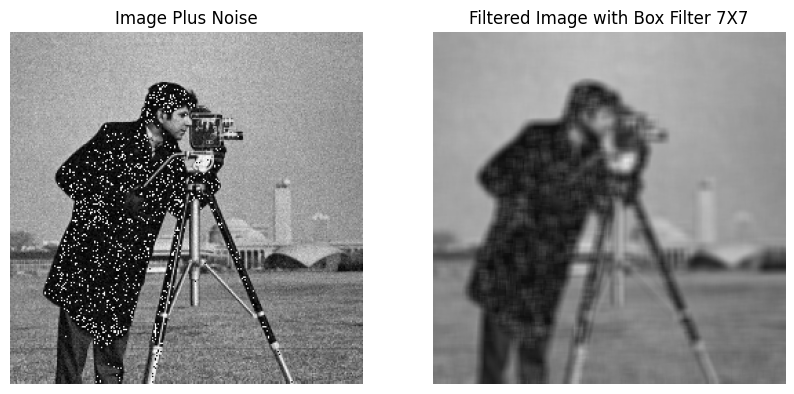

In [67]:
# Write below your code response to Question 1

# im is a 2D array (grayscale)
# kernel is 2D array, assume it is symmetric
# NOTE: my implementation uses zero padding at the borders

def image_filter(im, kernel):

   # Guard to check 2-D grayscale image
    if len(im.shape) != 2:
        raise ValueError("Input image must be a 2D grayscale image.")

    # Image dimensions
    im_height, im_width = im.shape

    # Kernel dimensions
    k_height, k_width = kernel.shape

    # Odd kernel dimensions so assume the 'center' of the kernel is in the middle
    pad_h = k_height // 2
    pad_w = k_width // 2

    # Create filtered image, initialized to zeros
    im_filtered = np.zeros_like(im, dtype=np.float64)

    # Pad the input image with zeros on all sides (black border)
    padded_image = np.pad(
        im,
        ((pad_h, pad_h), (pad_w, pad_w)),
        mode='constant',
        constant_values=0
    )

    # Loop over each pixel in the output
    for i in range(im_height):
        for j in range(im_width):
            # Initialize the sum for the current pixel
            pixel_value = 0.0

            # Loop over the kernel
            for m in range(k_height):
                for n in range(k_width):
                    # Find the corresponding location in the padded image
                    # relative to the top-left corner of the kernel
                    row = i + m
                    col = j + n

                    # Multiply-add operation
                    pixel_value += (padded_image[row, col] * kernel[m, n])

            # Assign the computed value to the output pixel
            im_filtered[i, j] = pixel_value

    # Convert the filtered image to uint8 before returning
    return im_filtered.astype(np.uint8)

# Test my image filter

# I did 2-D filter so let's test on cameraman
cameraman = cv2.imread("cameraman.png")
# Convert cameraman to grayscale (2D image)
cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2GRAY)

# Add noise to cameraman
noise_mu, noise_sigma = 0, 10 # mean and standard deviation
noise = np.random.normal(noise_mu,noise_sigma,cameraman.shape).astype(np.uint8)
noisy_cameraman= cameraman + noise

# Filter using my function
cameraman_filtered_my = image_filter(noisy_cameraman, kernel) # Using 7x7 box filter kernel defined previously
# Filter using 2D
cameraman_filtered_2D = cv2.filter2D(src=noisy_cameraman, ddepth=-1, kernel=kernel,borderType=cv2.BORDER_DEFAULT)  # Using 7x7 box filter kernel defined previously
# Filter using box
cameraman_filtered_box = cv2.boxFilter(src=noisy_cameraman, ksize = ksize, ddepth=-1, borderType=cv2.BORDER_DEFAULT) # Using 7x7 kernel

# Display results
plot_image_side_by_side(cameraman, noisy_cameraman, title_1="Orignal", title_2="Image Plus Noise")
plot_image_side_by_side(noisy_cameraman, cameraman_filtered_my, title_1="Image Plus Noise",title_2="Filtered Image with My Function 7X7")
plot_image_side_by_side(noisy_cameraman, cameraman_filtered_2D, title_1="Image Plus Noise",title_2="Filtered Image with 2D Filter 7X7")
plot_image_side_by_side(noisy_cameraman, cameraman_filtered_box, title_1="Image Plus Noise",title_2="Filtered Image with Box Filter 7X7")



## <font color= "blue">*Gaussian Blur*</font>

The function  <code>GaussianBlur</code> convolves the source image with the specified Gaussian kernel. It filters noise but does a better job of preserving the edges. It has the following parameters:

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>

If both sigmas were non-positive, the value will be calculated from the kernel size.


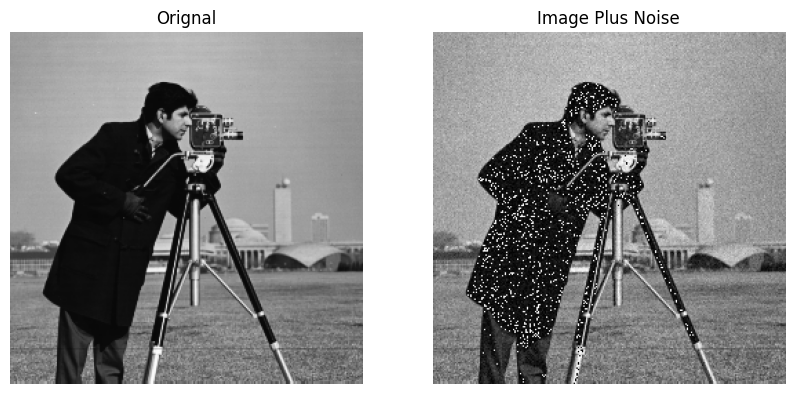

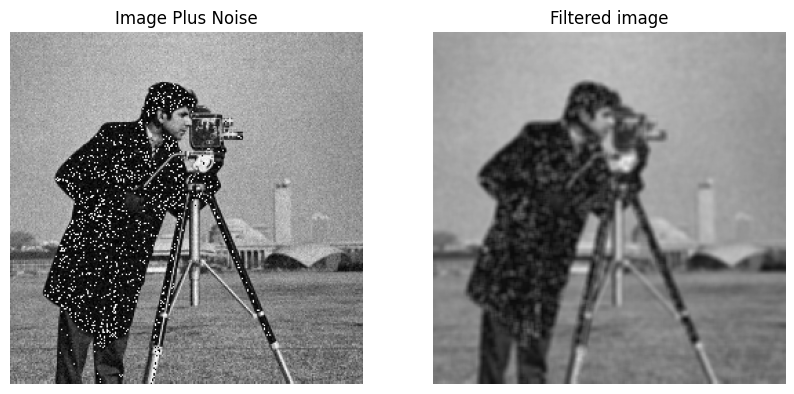

In [68]:
image = cv2.imread("cameraman.png",0)
noise_mu, noise_sigma = 0, 10 # mean and standard deviation
noise = np.random.normal(noise_mu,noise_sigma,image.shape).astype(np.uint8)
noisy_image = image + noise # if the sum > 255, it will be wrapped to sum-256
# Plots the original image and the image with noise using the function defined at the top
plot_image_side_by_side(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

# Filters the images using GaussianBlur on the noisy image with 5x5 kernel and sigma =2
image_filtered_Gaussian = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=2,sigmaY=2)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image_side_by_side(noisy_image, image_filtered_Gaussian, title_1="Image Plus Noise",title_2="Filtered image")

## <font color= "green"> Question 2 (3 Marks)</font>

In Gaussian blur, a larger value of sigma will make the image blurry, but you are still constrained by the size of the filter. Elaborate on this sentence focusing on these two points:

1. For a fixed kernel size (say 7x7), what will be the output if sigma is very small?
2. What will happen if sigma is large compared to the kernel size? What will the Gaussian blur be equivalent to in this case?

You can support your answer with result images or use [`getGaussianKernel()`](https://www.geeksforgeeks.org/python-opencv-getgaussiankernel-function/), which gives you the 1D Gaussian separable kernel. For a kernel size of 7x7, you may try sigma = 0.1, sigma = 1.2, and sigma = 20

Edit this cell to add your response to question 2. You can add code cells if needed.
<br> Answer:
1. If sigma is very small the kernel becomes highly concentrated in the center and the blur effect will be minimal. The filtered and orginal image will be nearly identical.
2. If sigma is large compared to the kernel size, the kernel values become nearly equal. So the gaussian filter will behave like a box/averaging filter, the image will become quite blurry and lose edge details.



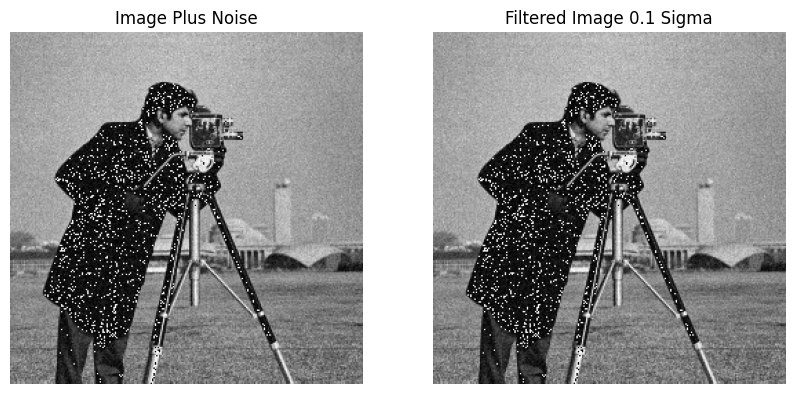

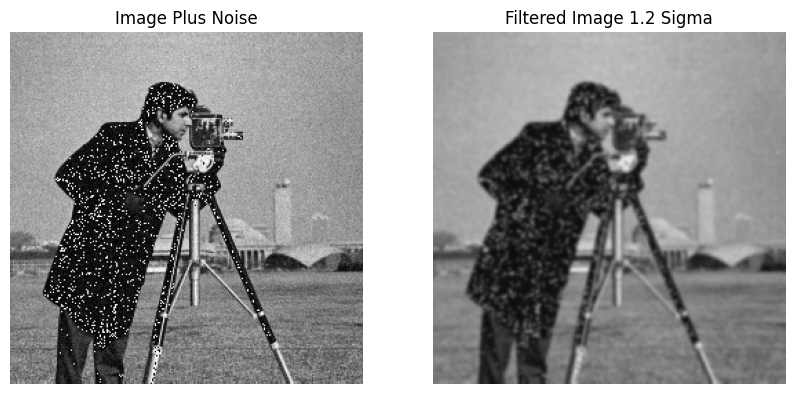

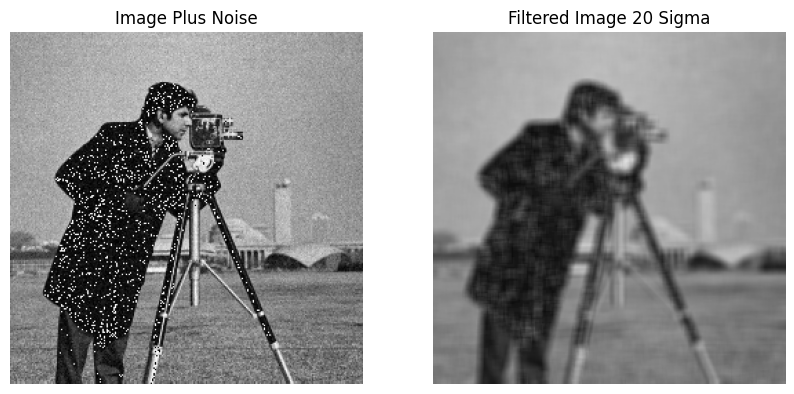

In [69]:
image_filtered_Gaussian_01 = cv2.GaussianBlur(noisy_image,(7,7),sigmaX=0.1,sigmaY=0.1)
image_filtered_Gaussian_12 = cv2.GaussianBlur(noisy_image,(7,7),sigmaX=1.2,sigmaY=1.2)
image_filtered_Gaussian_20 = cv2.GaussianBlur(noisy_image,(7,7),sigmaX=20,sigmaY=20)
plot_image_side_by_side(noisy_image, image_filtered_Gaussian_01, title_1="Image Plus Noise",title_2="Filtered Image 0.1 Sigma")
plot_image_side_by_side(noisy_image, image_filtered_Gaussian_12, title_1="Image Plus Noise",title_2="Filtered Image 1.2 Sigma")
plot_image_side_by_side(noisy_image, image_filtered_Gaussian_20, title_1="Image Plus Noise",title_2="Filtered Image 20 Sigma")

## <font color= "blue">*Image Sharpening*</font>

Image Sharpening involves smoothing the image and then highlighting the difference with surrounding pixels.  


## <font color= "green"> Question 3 (3 Marks)</font>

We can apply shaprepning with one direct kernel that combines the smooting and differincing operations. One common kernel for image sharpening is

\begin{equation*}
w = \begin{bmatrix}
-1 & -1 & -1 \\
-1 &  +9 & -1 \\
-1 & -1 & -1
\end{bmatrix}
\end{equation*}

Use `filter2D` function to apply this kernel to `koala.png` and plot both the input and output images.

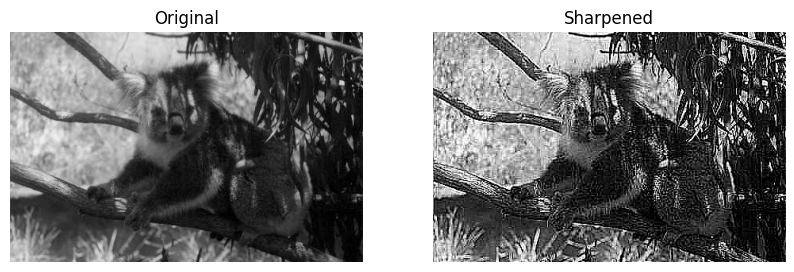

In [70]:
# Write your code for question 3 here
# Hint: You can leave (ddepth = -1) when using filter2D in this question
# ddepth = -1 basically means input and output image will have same data type

# Load koala image
koala = cv2.imread("koala.tif")

# Define sharpening kernel
sharpening_kernel = np.array([
                  [-1,-1,-1],
                  [-1,9,-1],
                  [-1,-1,-1]
                  ])

sharpened_koala = cv2.filter2D(src=koala, ddepth=-1, kernel=sharpening_kernel,borderType=cv2.BORDER_DEFAULT)

plot_image_side_by_side(koala, sharpened_koala, title_1="Original",title_2="Sharpened")

# <h2 align="left">**Part 2: Median Filtering**

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.
Median filters are used to reduce the salt and pepper noise (shot or impulse noise).



## <font color= "green"> Question 4 (3 Marks)</font>

The code below reads the image `cameraman.png` and adds some salt and pepper noise to it. We want to compare the effect of moving average filtering versus median filtering.
1. From what you learned in Part 1, apply a moving average filtering to the noisy image. You can any kerenl size you see best.
2. Use the function `medianBlur` (Google it online) to apply a median filter to the noisy image. Again, try different kernel sizes.
3. Plot the output images of the best results you got from both filters side by side.[link text](https://)

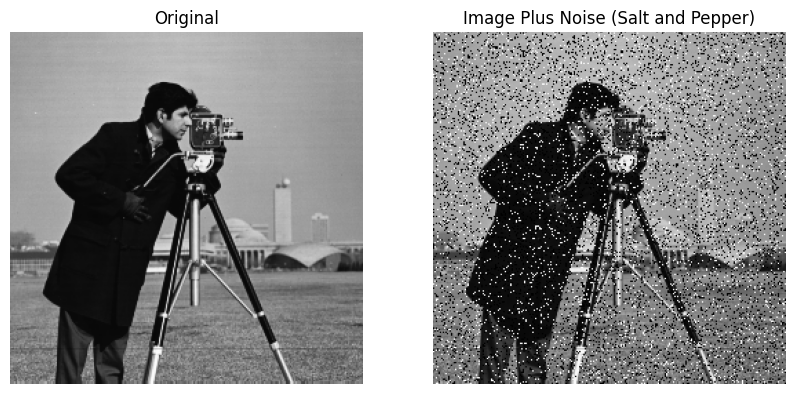

In [71]:
import random
def add_salt_pepper_noise(im):
    # source: https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/
    # Getting the dimensions of the image
    row , col = im.shape
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    img = im.copy()
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        # Pick a random y coordinate
        y_coord = random.randint(0, row - 1)
        # Pick a random x coordinate
        x_coord = random.randint(0, col - 1)
        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        # Pick a random y coordinate
        y_coord = random.randint(0, row - 1)
        # Pick a random x coordinate
        x_coord = random.randint(0, col - 1)
        # Color that pixel to black
        img[y_coord][x_coord] = 0
    return img

# Load the camera man image and add salt and pepper noise
im = cv2.imread("cameraman.png",cv2.IMREAD_GRAYSCALE)
im_noisy = add_salt_pepper_noise(im)
plot_image_side_by_side(im, im_noisy, title_1="Original",title_2="Image Plus Noise (Salt and Pepper)")


In [72]:
# Write your codes here to compare the box and median filter

# Apply median filtering, experiment with different kernel sizes
cameraman_filtered_median_3 = cv2.medianBlur(im_noisy, 3)
cameraman_filtered_median_5 = cv2.medianBlur(im_noisy, 5)
cameraman_filtered_median_7 = cv2.medianBlur(im_noisy, 7)

# Display median filtering results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

titles = ["Noisy Image", "Median Filter 3x3", "Median Filter 5x5", "Median Filter 7x7"]
images = [im_noisy, cameraman_filtered_median_3, cameraman_filtered_median_5, cameraman_filtered_median_7]

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

# It looks like 5x5 median filter is the best

# Compare to box/average filter
cameraman_filtered_box = cv2.boxFilter(src=im_noisy, ksize = (5,5), ddepth=-1, borderType=cv2.BORDER_DEFAULT)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ["Noisy Image", "Median Filter 5x5", "Average Filter 5x5"]
images = [im_noisy, cameraman_filtered_median_5, cameraman_filtered_box]
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(titles[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# <h2 align="left">**Part 3: Edge Detection**

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change.

## <font color= "blue">*Sobel Filter*</font>

 we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let's use the Sobel edge detector.

 Sobel approximates the derivative with some smoothing by convolving the image with the following kernels
\begin{equation*}   
w_x = \begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{bmatrix}
\end{equation*}  and
\begin{equation*}
w_y = \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
\end{equation*}

The function `cv2.sobel` takes the following parameters:
<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>

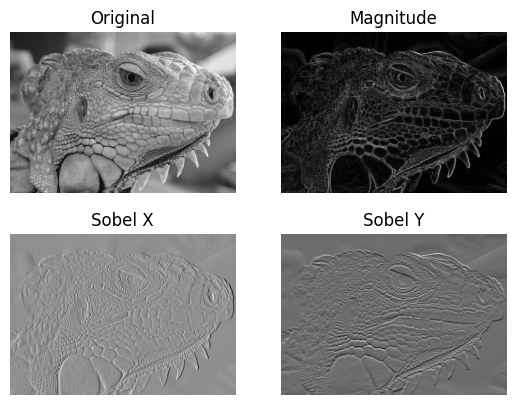

In [73]:
# Loads the iguana image
im_iguana = cv2.imread('iguana.png', cv2.IMREAD_GRAYSCALE)
ddepth = cv2.CV_32F # to detect the negative values

# Apply Sobel in both directions
sobel_x = cv2.Sobel(src=im_iguana, ddepth=ddepth, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(src=im_iguana, ddepth=ddepth, dx=0, dy=1, ksize=3)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

plt.subplot(2,2,1),plt.imshow(im_iguana,cmap = 'gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Magnitude')
plt.axis('off')

plt.subplot(2,2,3),plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2,2,4),plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()

## <font color= "blue">*Canny Edge Detector*</font>

The Canny edge detection algorithm can be broken down in to five steps:

1. Smoothing
2. Finding gradients
3. Non-maximum suppression
4. Double thresholding
5. Edge tracking by hysterisis

The function `cv2.Canny` applies Canny algorithm and returns the image containing the detected edges.
Note that `cv2.Canny` employs the Sobel operator which implies smoothing based on the Sobel kernel size. However, it is better to do a smoothing step in advance.  

Now, let's apply Canny algorithm to the iguana image.

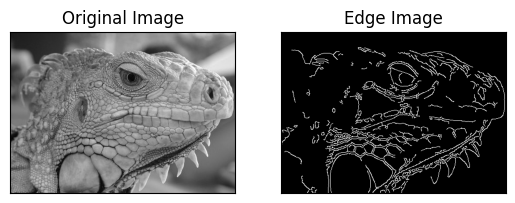

In [74]:
im_smoothed = cv2.GaussianBlur(im_iguana, ksize = (5,5),sigmaX = 0, sigmaY = 0)
low_th = 100
high_th = 200
edges = cv2.Canny(im_smoothed, low_th, high_th)
plt.subplot(121),plt.imshow(im_iguana,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## <font color= "green"> Question 5 (3 Marks)</font>

Write codes below to apply Canny edge detector to `cameraman.png`. Adjust the parameters as you see fit to obtain the best results.

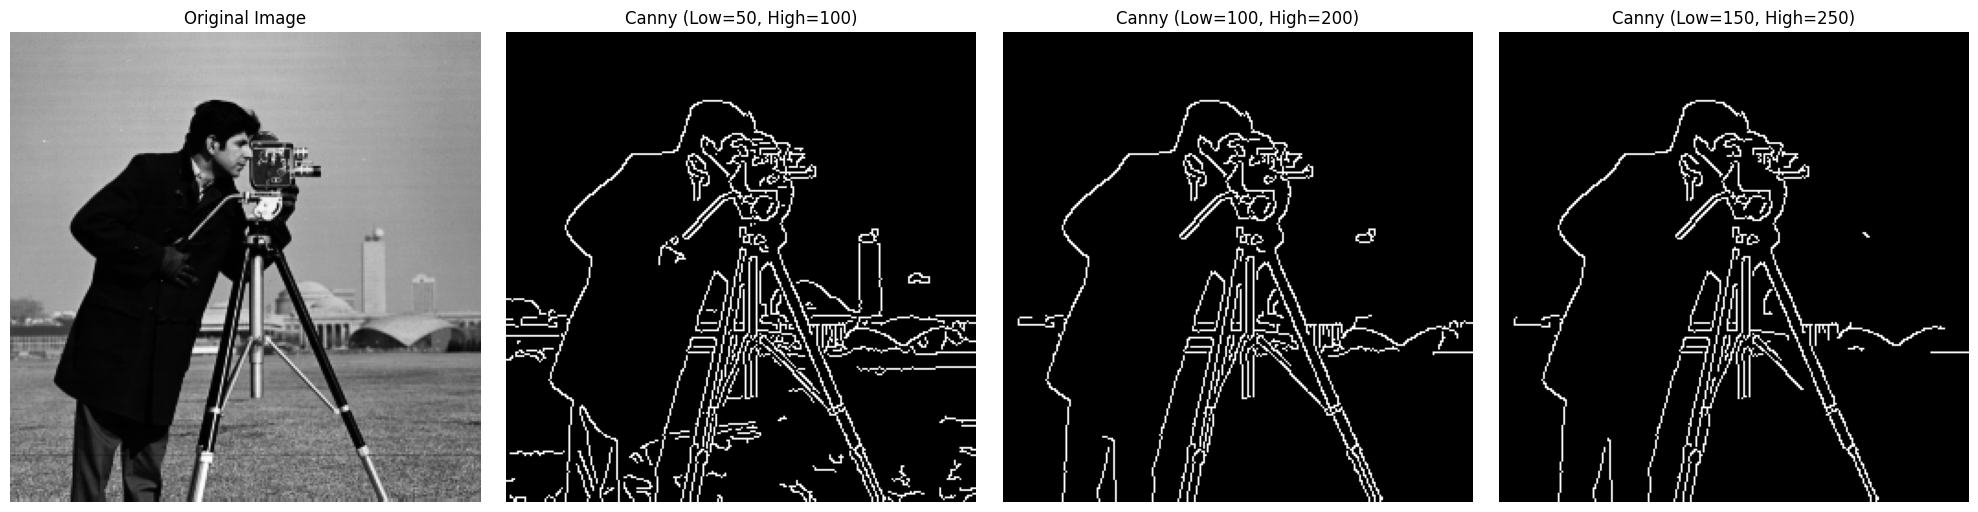

In [75]:
# Write your code here to anwer question 5

# Load the cameraman image in grayscale
cameraman = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing before edge detection.
# NOTE: sigmaX 0 and sigmaY 0 basically tells openCV to auto-compute sigma based on kernel size
cameraman_smoothed = cv2.GaussianBlur(cameraman, ksize=(5, 5), sigmaX=0, sigmaY=0)

# Experimenting with different threshold values for Canny Edge Detection
low_thresholds = [50, 100, 150]
high_thresholds = [100, 200, 250]

# Store results for visualization
edge_results = []

for low_th, high_th in zip(low_thresholds, high_thresholds):
    edges = cv2.Canny(cameraman_smoothed, low_th, high_th)
    edge_results.append((low_th, high_th, edges))

# Plot original and edge-detected images with different thresholds
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axes[0].imshow(cameraman, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Edge detection results
for i, (low_th, high_th, edges) in enumerate(edge_results, start=1):
    axes[i].imshow(edges, cmap="gray")
    axes[i].set_title(f"Canny (Low={low_th}, High={high_th})")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Looks like low=50 and high=100 produced best results



# <h2 align="left">**Part 4: Morphological Operations**

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening and  Closing.

## <font color= "green"> Question 6 (5 Marks)</font>
The code below reads a binary image `shapes.tif`. With the help of the tutorial in this [link](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html), You task is to apply a 17x17 box structuring element to the binary image to perform and display the results of the following operations:


1. Erosion
2. Dilation
3. Opening
4. Closing

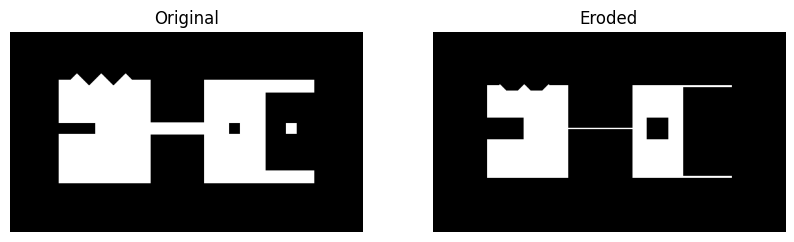

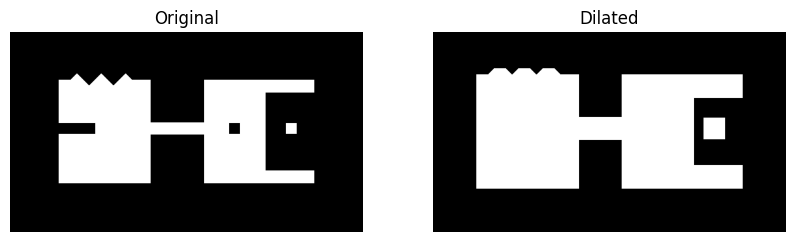

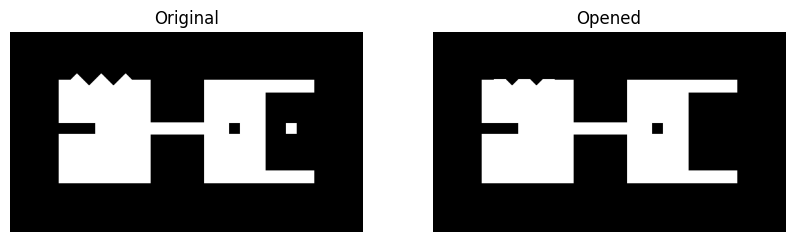

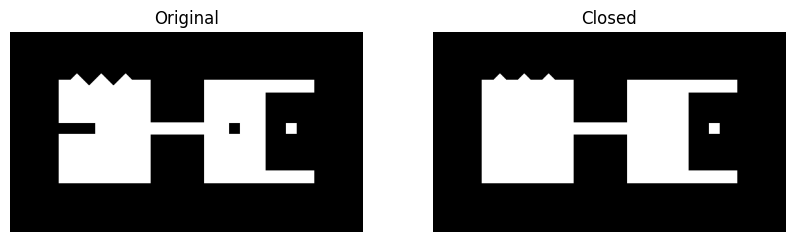

In [76]:
# Loading the binary image
shapes = cv2.imread('shapes.tif', cv2.IMREAD_GRAYSCALE)

# Define a 17x17 box structuring element
kernel = np.ones((17,17),np.uint8)

# Apply Morphological Operations

# Erosion
shapes_erosion = cv2.erode(shapes,kernel,iterations = 1)

# Dilation
shapes_dilation = cv2.dilate(shapes,kernel,iterations = 1)

# Opening
shapes_opening = cv2.morphologyEx(shapes, cv2.MORPH_OPEN, kernel)

# Closing
shapes_closing = cv2.morphologyEx(shapes, cv2.MORPH_CLOSE, kernel)

# Display results
plot_image_side_by_side(shapes, shapes_erosion, title_1="Original",title_2="Eroded")
plot_image_side_by_side(shapes, shapes_dilation, title_1="Original",title_2="Dilated")
plot_image_side_by_side(shapes, shapes_opening, title_1="Original",title_2="Opened")
plot_image_side_by_side(shapes, shapes_closing, title_1="Original",title_2="Closed")

In [ ]:
%pip install nbconvert
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc.

In [83]:
!jupyter nbconvert --to pdf ENEL503_Lab2_Aarushi_Roychoudhury.ipynb

[NbConvertApp] Converting notebook ENEL503_Lab2_Aarushi_Roychoudhury.ipynb to pdf
[NbConvertApp] Support files will be in ENEL503_Lab2_Aarushi_Roychoudhury_files/
[NbConvertApp] Making directory ./ENEL503_Lab2_Aarushi_Roychoudhury_files
[NbConvertApp] Writing 85115 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 4149137 bytes to ENEL503_Lab2_Aarushi_Roychoudhury.pdf
